## AI Assignment 4

Meetakshi Setiya, 2019253

29.11.2022

In [1]:
! pip install -U scikit-learn seaborn pandas numpy

In [173]:
! pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 1.4 MB/s eta 0:00:0000:0100:01


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter


In [2]:
sns.set()

In [3]:
df = pd.read_csv("roo_data.csv")
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


The columns in the dataframe:

In [4]:
df.columns

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

A general idea of the data:

In [5]:
df.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


Number of possible output categories:

In [43]:
print(df['Suggested Job Role'].unique())
print(len(df['Suggested Job Role'].unique()))

['Database Developer' 'Portal Administrator'
 'Systems Security Administrator' 'Business Systems Analyst'
 'Software Systems Engineer' 'Business Intelligence Analyst'
 'CRM Technical Developer' 'Mobile Applications Developer' 'UX Designer'
 'Quality Assurance Associate' 'Web Developer'
 'Information Security Analyst' 'CRM Business Analyst' 'Technical Support'
 'Project Manager' 'Information Technology Manager' 'Programmer Analyst'
 'Design & UX' 'Solutions Architect' 'Systems Analyst'
 'Network Security Administrator' 'Data Architect' 'Software Developer'
 'E-Commerce Analyst' 'Technical Services/Help Desk/Tech Support'
 'Information Technology Auditor' 'Database Manager'
 'Applications Developer' 'Database Administrator' 'Network Engineer'
 'Software Engineer' 'Technical Engineer' 'Network Security Engineer'
 'Software Quality Assurance (QA) / Testing']
34


In [9]:
print(df.dtypes)

Acedamic percentage in Operating Systems     int64
percentage in Algorithms                     int64
Percentage in Programming Concepts           int64
Percentage in Software Engineering           int64
Percentage in Computer Networks              int64
Percentage in Electronics Subjects           int64
Percentage in Computer Architecture          int64
Percentage in Mathematics                    int64
Percentage in Communication skills           int64
Hours working per day                        int64
Logical quotient rating                      int64
hackathons                                   int64
coding skills rating                         int64
public speaking points                       int64
can work long time before system?           object
self-learning capability?                   object
Extra-courses did                           object
certifications                              object
workshops                                   object
talenttests taken?             

This is a multiclass classification problem


Some graphs to visualize the data:

array([[<AxesSubplot: title={'center': 'Acedamic percentage in Operating Systems'}>,
        <AxesSubplot: title={'center': 'percentage in Algorithms'}>,
        <AxesSubplot: title={'center': 'Percentage in Programming Concepts'}>,
        <AxesSubplot: title={'center': 'Percentage in Software Engineering'}>],
       [<AxesSubplot: title={'center': 'Percentage in Computer Networks'}>,
        <AxesSubplot: title={'center': 'Percentage in Electronics Subjects'}>,
        <AxesSubplot: title={'center': 'Percentage in Computer Architecture'}>,
        <AxesSubplot: title={'center': 'Percentage in Mathematics'}>],
       [<AxesSubplot: title={'center': 'Percentage in Communication skills'}>,
        <AxesSubplot: title={'center': 'Hours working per day'}>,
        <AxesSubplot: title={'center': 'Logical quotient rating'}>,
        <AxesSubplot: title={'center': 'hackathons'}>],
       [<AxesSubplot: title={'center': 'coding skills rating'}>,
        <AxesSubplot: title={'center': 'public 

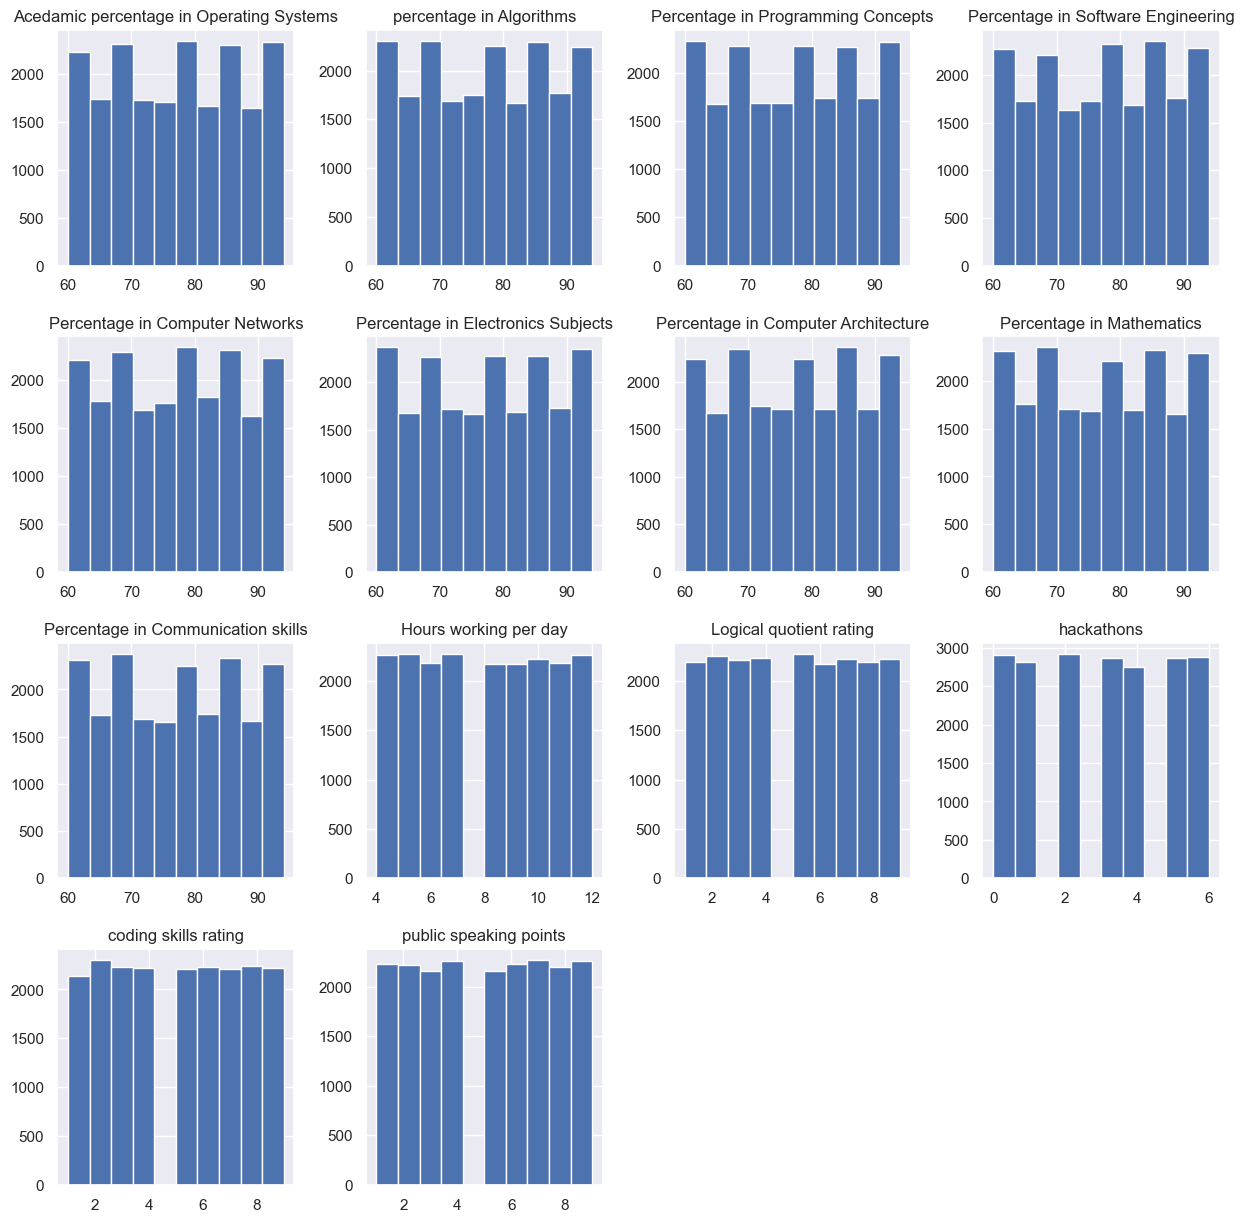

In [6]:
df.hist(figsize=[15,15])

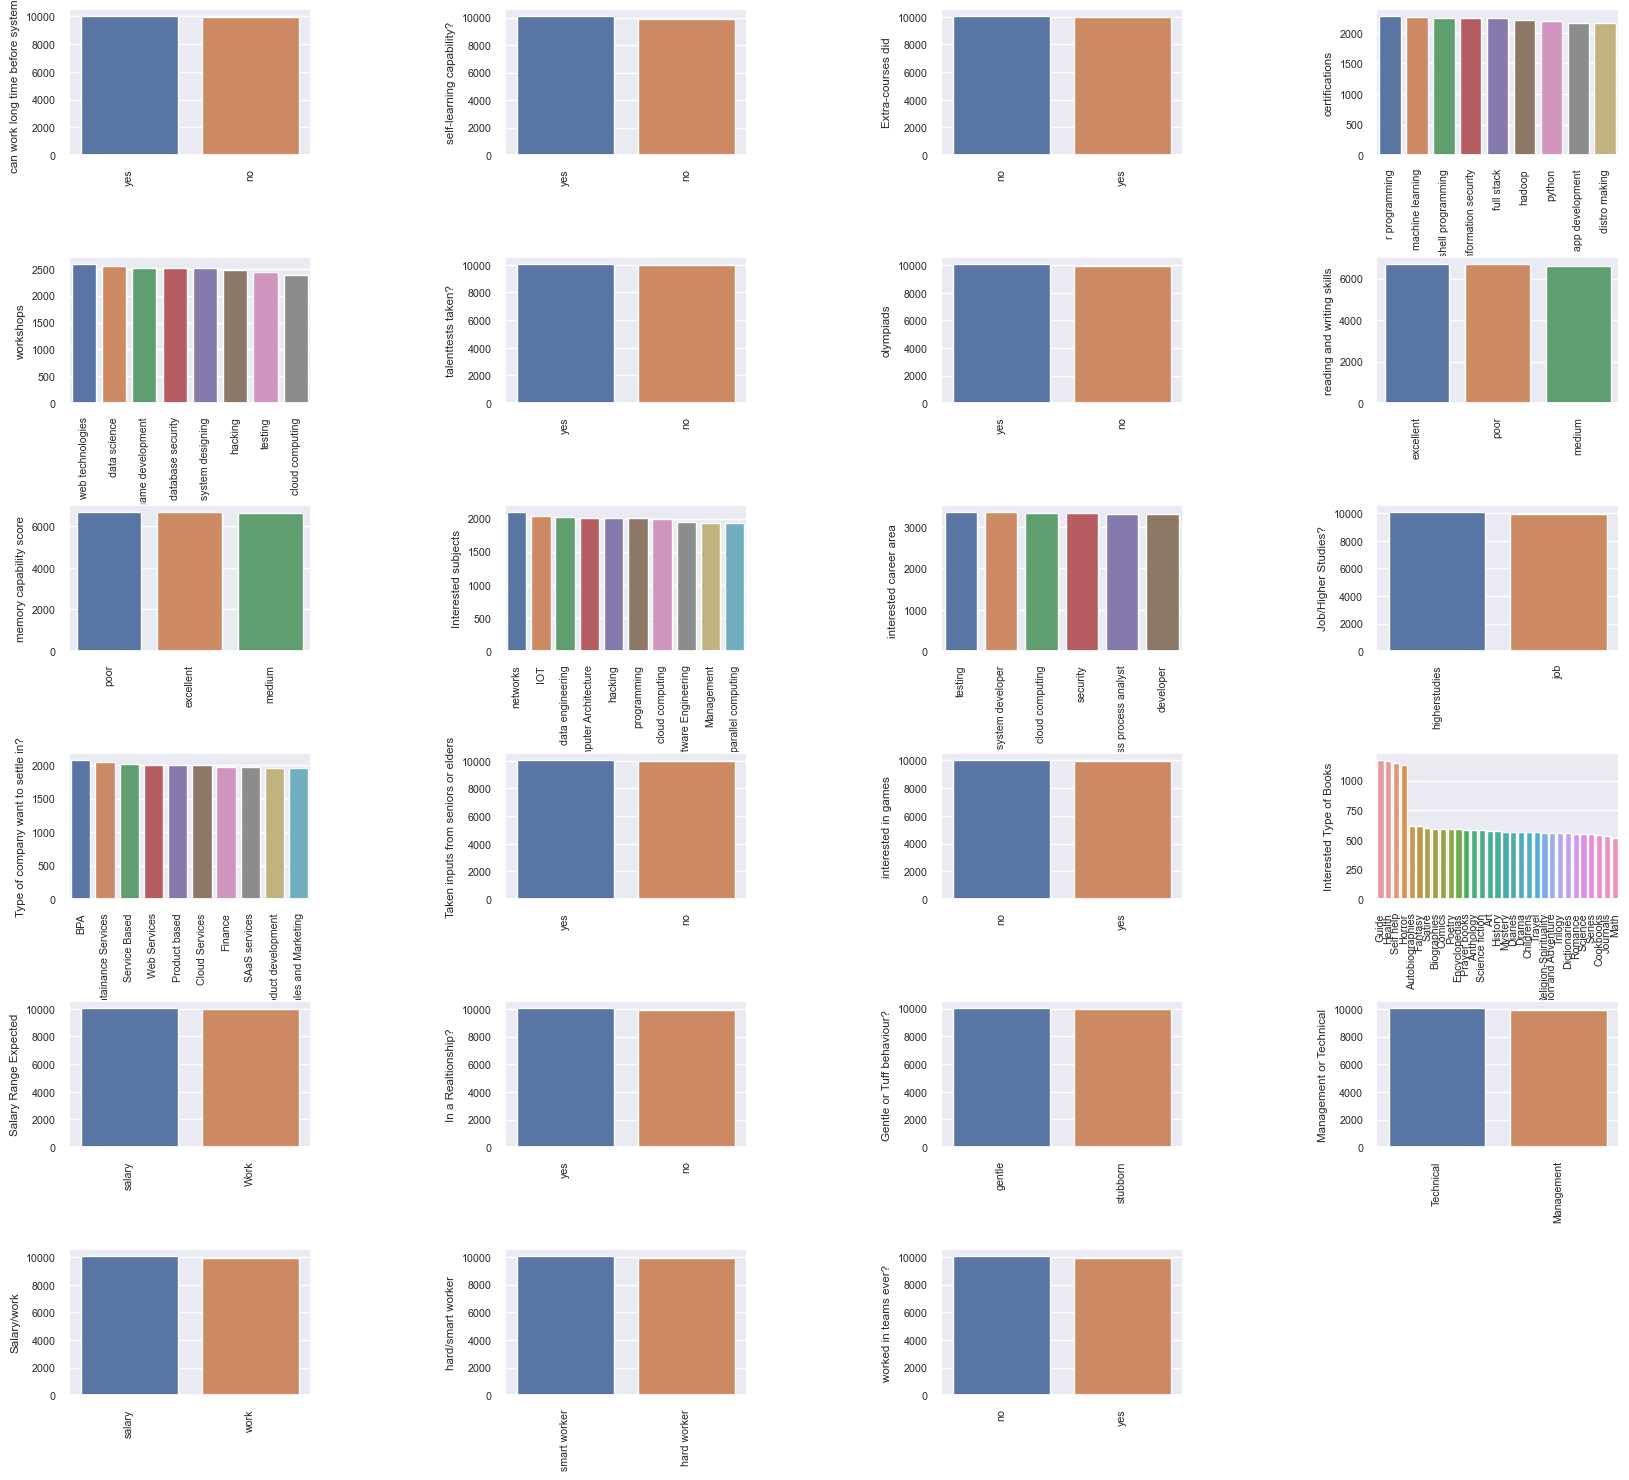

In [41]:
#create a barplot for categorical data in the dataframe df
import matplotlib.pyplot as plt
def create_barplot(dataf):
    sns.set(font_scale = 0.7)
    fig, axes = plt.subplots(6, 4, figsize=(20, 18))
    fig.subplots_adjust(hspace=0.7, wspace=0.8)
    count = 0
    for i in dataf.columns:
      if(dataf[i].dtype == "O"):
        p = sns.barplot(x=dataf[i].value_counts().index, y=dataf[i].value_counts(), ax=axes[count//4, count%4])
        p.set_xticklabels(labels=dataf[i].value_counts().index, rotation=90)
        count+=1
    fig.delaxes(axes[5,3])
    plt.show()

create_barplot(df[df.columns[:-1]])


In [10]:
labels = df[df.columns[-1]]
print(len(labels.unique()))

34


The database has a slight imbalance. Database developer has almost double the number of samples than the rest of the jobs. A few strategies that can be employed to combat this imbalance is : 
1. using SMOTE
2. grouping of jobs so that we have lower number of labels


Now, categorical data has to be converted to numeric representation. This can be achieved by one-hot encoding or ordinal encoding. I am going to do one-hot encoding,

In [11]:
df_ohe = pd.get_dummies(df[df.columns[:-1]], drop_first=True)
df_ohe.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books_Travel,Interested Type of Books_Trilogy,Salary Range Expected_salary,In a Realtionship?_yes,Gentle or Tuff behaviour?_stubborn,Management or Technical_Technical,Salary/work_work,hard/smart worker_smart worker,worked in teams ever?_yes,Introvert_yes
0,69,63,78,87,94,94,87,84,61,9,...,0,0,1,0,1,0,0,0,1,0
1,78,62,73,60,71,70,73,84,91,12,...,0,0,1,1,0,1,0,0,0,1
2,71,86,91,87,61,81,72,72,94,11,...,1,0,0,0,1,0,1,0,0,1
3,76,87,60,84,89,73,62,88,69,7,...,0,0,0,1,0,0,1,1,1,1
4,92,62,90,67,71,89,73,71,73,4,...,0,0,1,0,1,0,1,0,1,1


In [12]:
df_ohe.columns[:-1]

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       ...
       'Interested Type of Books_Series', 'Interested Type of Books_Travel',
       'Interested Type of Books_Trilogy', 'Salary Range Expected_salary',
       'In a Realtionship?_yes', 'Gentle or Tuff behaviour?_stubborn',
       'Management or Technical_Technical', 'Salary/work_work',
       'hard/smart worker_smart worker', 'worked in teams ever?_yes'],
      dtype='object', length=101)

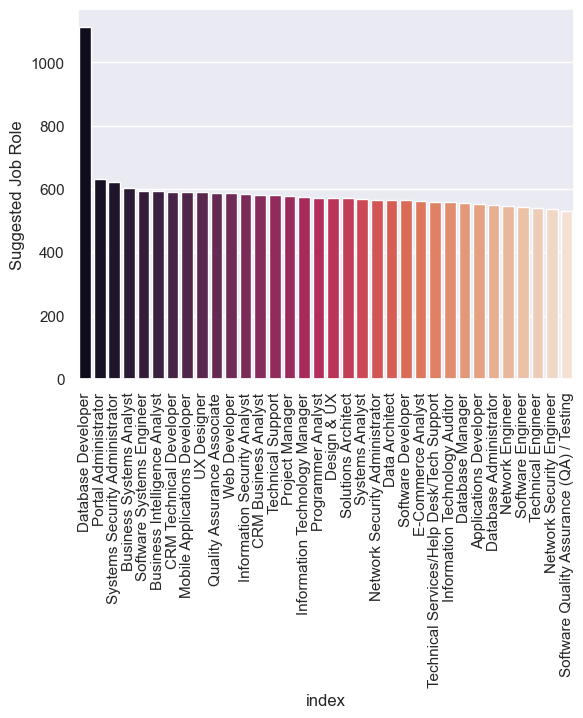

In [19]:
ll = labels.value_counts().reset_index()
plot = sns.barplot(palette="rocket", data=ll, x="index", y="Suggested Job Role")
t = plot.set_xticklabels(labels=labels.unique(), rotation=90)

In [226]:
def print_confusion_matrix(y_pred, y_true, target_names, bin=False):
    conf_matrix = confusion_matrix(y_true, y_pred, labels=target_names)
    plt.figure(figsize=(14,14))
    if bin:
        plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix, square=True, annot=True, cmap='rocket', fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
    print("Confusion Matrix:")
    plt.grid(False)
    plt.show()

In [240]:
def print_classwise_confusion_matrix(y_pred, y_true, target_names, bin=False):
    sns.set(font_scale = 0.6)
    mul_conf_matrix = multilabel_confusion_matrix(y_true, y_pred, labels=target_names)
    if bin:
      fig, axes = plt.subplots(1, 5, figsize=(12, 2))
      fig.subplots_adjust(hspace=0.3, wspace=0.5)
      for i in range(5):
        sns.heatmap(mul_conf_matrix[i], annot=True, fmt="d", ax=axes[i%5], cbar=False, cmap="rocket")
        axes[i%5].set_title(f"Class {target_names[i]}")
      plt.show()
      return
    fig, axes = plt.subplots(7, 5, figsize=(12, 15))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    for i in range(34):
      sns.heatmap(mul_conf_matrix[i], annot=True, fmt="d", ax=axes[i//5, i%5], cbar=False, cmap="rocket")
      axes[i//5, i%5].set_title(f"Class {target_names[i]}")
    fig.delaxes(axes[6,4])
    plt.show()

In [67]:
def print_classification_report(y_pred, y_true, target_names):
    accuracy = accuracy_score(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=target_names)
    conf_matrix = confusion_matrix(y_true, y_pred, labels=target_names)
    classwise_acc = 100*(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]).diagonal()
    print(f"Mean Accuracy: {accuracy}")
    print(f"Classification Report: \n{cr}")
    print()
    for i in range(len(target_names)):
        print("Accuracy for class", i, ":", classwise_acc[i], "%")

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(df_ohe)

By default, train_test_split shuffles the data. We will use stratify to ensure that the distribution of the labels in the train and test set is the same as the original dataset.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, stratify=labels, random_state=68, test_size=0.3)

Start with default hyperparameters of the MLP classifier


In [119]:
clf = MLPClassifier(random_state=1).fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [120]:
y_train_pred = clf.predict(X_train)
print("Training Metrics:")
print_classification_report(y_train, y_train_pred, clf.classes_)

Training Metrics:
Mean Accuracy: 0.2704285714285714
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.31      0.31      0.31       382
            Business Intelligence Analyst       0.27      0.29      0.28       348
                 Business Systems Analyst       0.23      0.25      0.24       375
                     CRM Business Analyst       0.24      0.27      0.25       372
                  CRM Technical Developer       0.15      0.25      0.19       238
                           Data Architect       0.28      0.26      0.27       434
                   Database Administrator       0.26      0.31      0.28       346
                       Database Developer       0.32      0.29      0.30       448
                         Database Manager       0.32      0.29      0.31       446
                              Design & UX       0.36      0.30      0.33       485
          

In [121]:
print("Testing Metrics: ")
y_pred = clf.predict(X_test)
print_classification_report(y_test, y_pred, clf.classes_)

Testing Metrics: 
Mean Accuracy: 0.03266666666666666
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.02      0.02      0.02       164
            Business Intelligence Analyst       0.02      0.03      0.03       150
                 Business Systems Analyst       0.03      0.03      0.03       153
                     CRM Business Analyst       0.03      0.03      0.03       158
                  CRM Technical Developer       0.02      0.05      0.03        84
                           Data Architect       0.05      0.04      0.04       202
                   Database Administrator       0.03      0.03      0.03       175
                       Database Developer       0.01      0.01      0.01       189
                         Database Manager       0.04      0.03      0.04       225
                              Design & UX       0.04      0.03      0.03       235
         

Confusion Matrix:


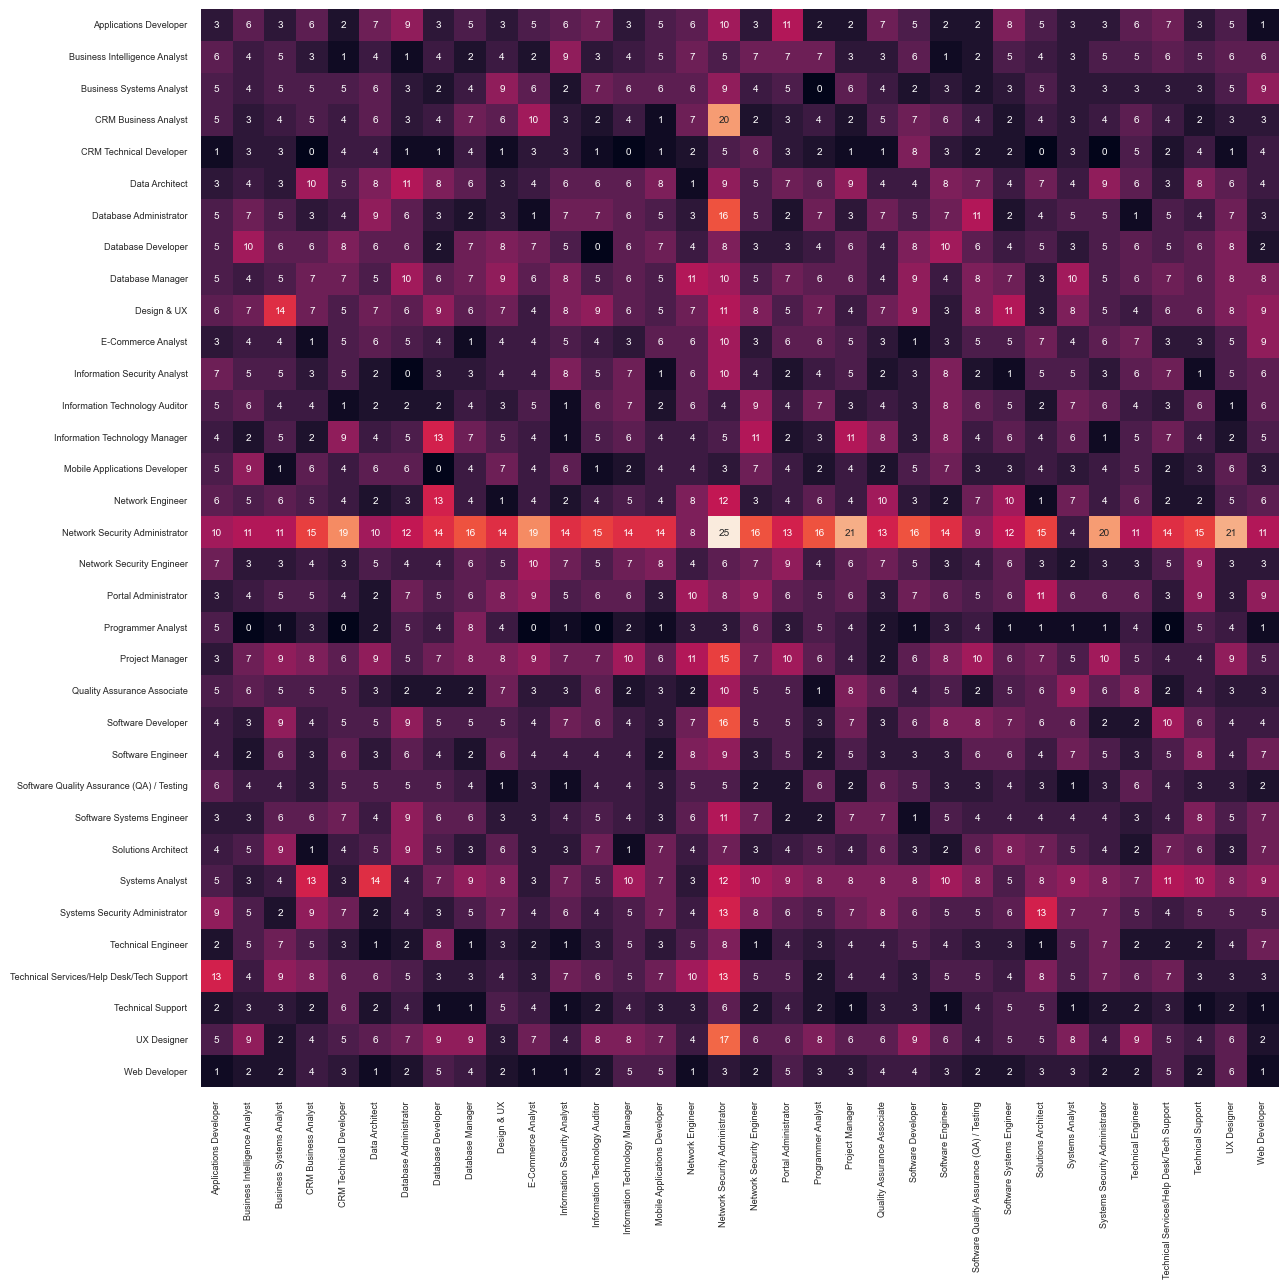

In [122]:
print_confusion_matrix(y_test, y_pred, clf.classes_)

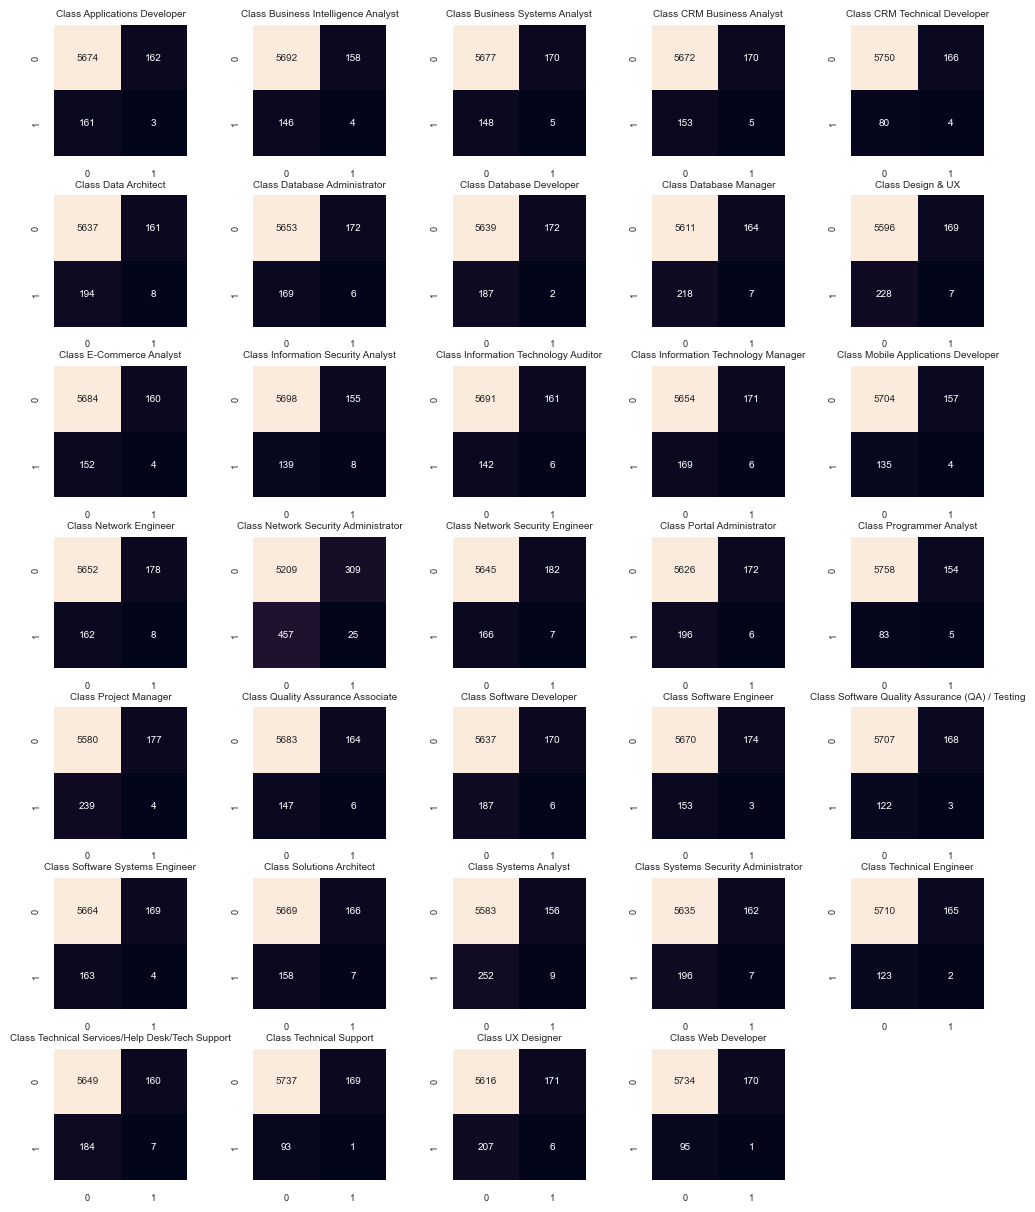

In [123]:
print_classwise_confusion_matrix(y_test, y_pred, clf.classes_)

With default parameter, we get a very poor accuracy of 3.48%. We will now try hyperparameter tuning using GridSearch to tweak the parameters of the model.

In [134]:
params = {
    'hidden_layer_sizes': [(64,), (64, 32,)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam'],
    'learning_rate': ['adaptive', 'constant'],
    'max_iter': [500, 1000]
}
mlp_clf = MLPClassifier()
gridcv_clf = GridSearchCV(mlp_clf, param_grid=params, cv=3, n_jobs=-1)

In [135]:
gridcv_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(64,), (64, 32)],
                         'learning_rate': ['adaptive', 'constant'],
                         'max_iter': [500, 1000], 'solver': ['adam']})

In [136]:
best_params = gridcv_clf.best_params_
print(f"Best params found: {best_params}")

Best params found: {'activation': 'logistic', 'hidden_layer_sizes': (64, 32), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


In [137]:
#run the best model on the test set
y_pred = gridcv_clf.predict(X_test)
print_classification_report(y_test, y_pred, gridcv_clf.classes_)

Mean Accuracy: 0.028166666666666666
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.01      0.01      0.01       102
            Business Intelligence Analyst       0.04      0.03      0.04       232
                 Business Systems Analyst       0.01      0.01      0.01       136
                     CRM Business Analyst       0.02      0.05      0.03        81
                  CRM Technical Developer       0.03      0.05      0.04       100
                           Data Architect       0.01      0.01      0.01       142
                   Database Administrator       0.02      0.02      0.02       194
                       Database Developer       0.02      0.02      0.02       158
                         Database Manager       0.03      0.02      0.02       235
                              Design & UX       0.03      0.03      0.03       178
                       E-C

Confusion Matrix:


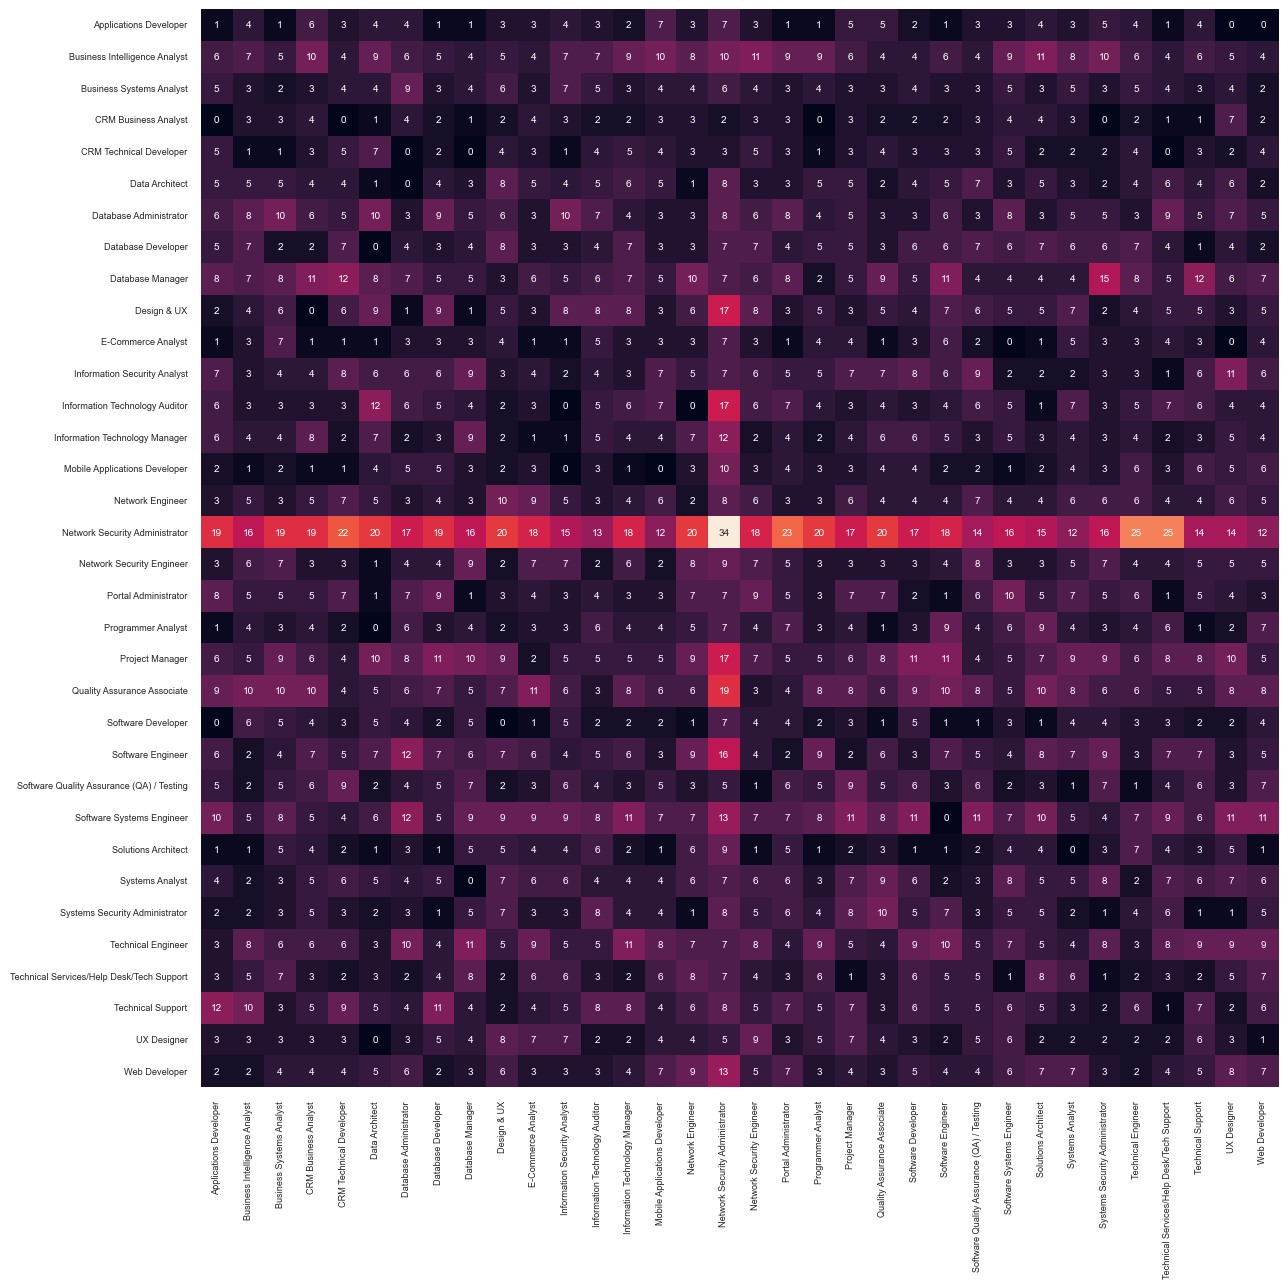

In [138]:
print_confusion_matrix(y_test, y_pred, gridcv_clf.classes_)

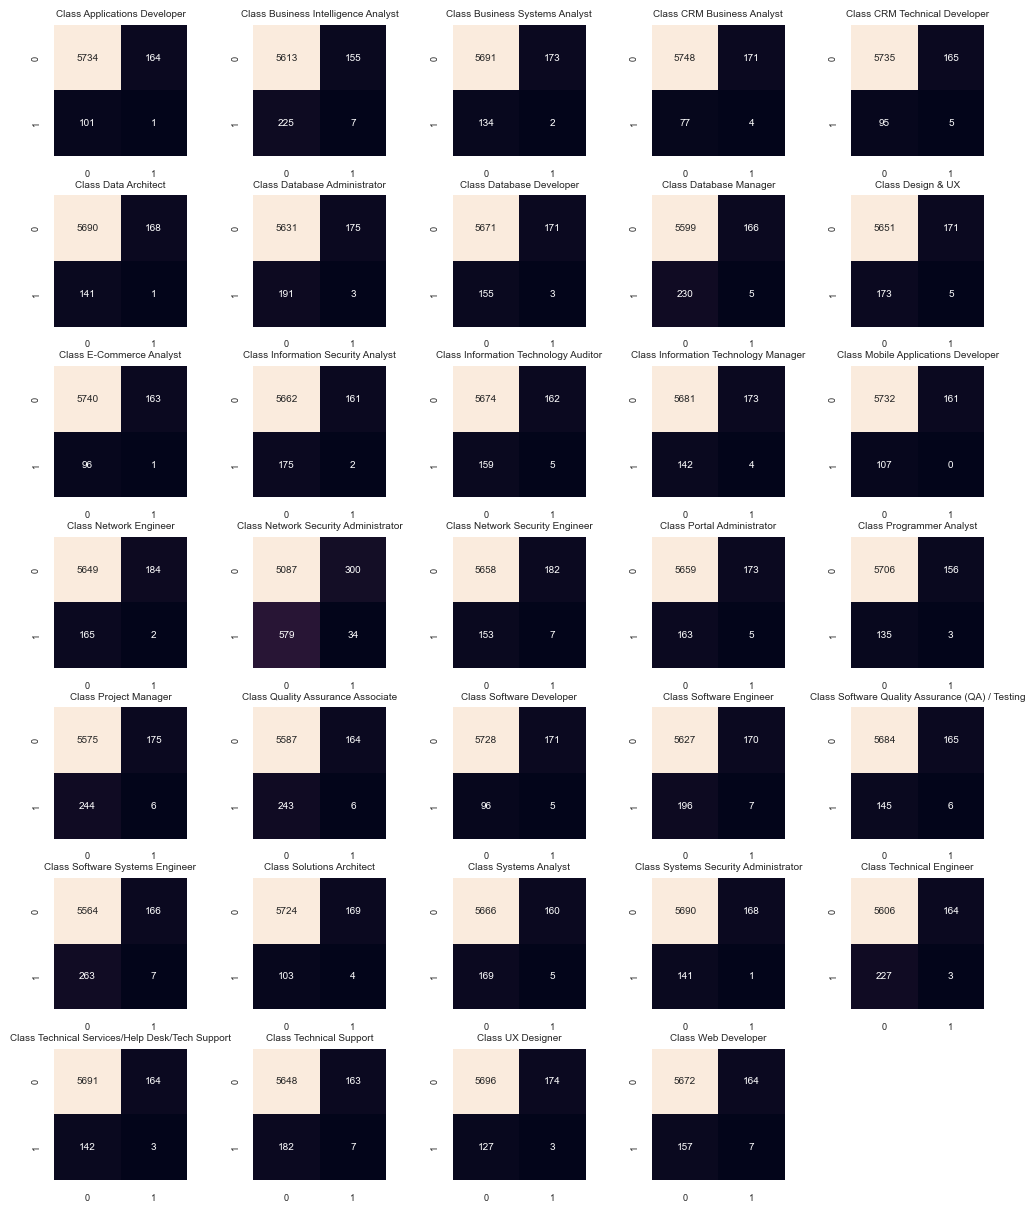

In [139]:
print_classwise_confusion_matrix(y_test, y_pred, gridcv_clf.classes_)

The model is overfitting. One way to prevent this is to change the split of the data

In [142]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, labels, stratify=labels, random_state=68, test_size=0.2)

In [143]:
mlp_clf2 = MLPClassifier()
gridcv_clf2 = GridSearchCV(mlp_clf2, param_grid=params, cv=3, n_jobs=-1)

In [144]:
gridcv_clf2.fit(X_train2, y_train2)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(64,), (64, 32)],
                         'learning_rate': ['adaptive', 'constant'],
                         'max_iter': [500, 1000], 'solver': ['adam']})

In [146]:
best_params = gridcv_clf2.best_params_
print(f"Best params found: {best_params}")

Best params found: {'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [147]:
#run the best model on the test set
y_pred2 = gridcv_clf2.predict(X_test2)
print_classification_report(y_test2, y_pred2, gridcv_clf2.classes_)

Mean Accuracy: 0.09583333333333334
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.08      0.13      0.10       107
            Business Intelligence Analyst       0.03      0.06      0.04        89
                 Business Systems Analyst       0.10      0.09      0.10       197
                     CRM Business Analyst       0.03      0.07      0.05        81
                  CRM Technical Developer       0.02      0.07      0.03        59
                           Data Architect       0.02      0.04      0.03       104
                   Database Administrator       0.15      0.13      0.14       196
                       Database Developer       0.06      0.15      0.08        67
                         Database Manager       0.11      0.12      0.12       159
                              Design & UX       0.16      0.09      0.11       332
                       E-Co

Try a different train-test split

In [148]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, labels, stratify=labels, random_state=68, test_size=0.4)

In [149]:
mlp_clf3 = MLPClassifier()
gridcv_clf3 = GridSearchCV(mlp_clf3, param_grid=params, cv=3, n_jobs=-1)

In [150]:
gridcv_clf3.fit(X_train3, y_train3)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(64,), (64, 32)],
                         'learning_rate': ['adaptive', 'constant'],
                         'max_iter': [500, 1000], 'solver': ['adam']})

In [151]:
best_params3 = gridcv_clf3.best_params_
print(f"Best params found: {best_params3}")

Best params found: {'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}


In [152]:
#run the best model on the test set
y_pred3 = gridcv_clf3.predict(X_test3)
print_classification_report(y_test3, y_pred3, gridcv_clf3.classes_)

Mean Accuracy: 0.030166666666666668
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.13      0.09      0.11       251
            Business Intelligence Analyst       0.00      0.00      0.00        78
                 Business Systems Analyst       0.02      0.03      0.02       101
                     CRM Business Analyst       0.02      0.03      0.03       137
                  CRM Technical Developer       0.01      0.01      0.01       136
                           Data Architect       0.01      0.02      0.01       100
                   Database Administrator       0.03      0.02      0.03       269
                       Database Developer       0.02      0.03      0.03       128
                         Database Manager       0.06      0.04      0.05       232
                              Design & UX       0.02      0.03      0.03       121
                       E-C

In [323]:
X_train3_too, X_test3_too, y_train3_too, y_test3_too = train_test_split(X, labels, stratify=labels, random_state=68, test_size=0.1)

In [324]:
mlp_clf3_too = MLPClassifier()
gridcv_clf3_too= GridSearchCV(mlp_clf3_too, param_grid=params, cv=3, n_jobs=-1)

In [325]:
gridcv_clf3_too.fit(X_train3_too, y_train3_too)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(64,), (64, 32)],
                         'learning_rate': ['adaptive', 'constant'],
                         'max_iter': [500, 1000], 'solver': ['adam']})

In [326]:
print("Best params found: ", gridcv_clf3_too.best_params_)

Best params found:  {'activation': 'logistic', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}


In [329]:
#run the best model on the test set
y_pred3_too = gridcv_clf3_too.predict(X_test3_too)
print_classification_report(y_test3_too, y_pred3_too, gridcv_clf3.classes_)

Mean Accuracy: 0.0335
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.00      0.00      0.00        72
            Business Intelligence Analyst       0.02      0.02      0.02        51
                 Business Systems Analyst       0.00      0.00      0.00        43
                     CRM Business Analyst       0.05      0.05      0.05        55
                  CRM Technical Developer       0.00      0.00      0.00        41
                           Data Architect       0.02      0.02      0.02        55
                   Database Administrator       0.03      0.04      0.03        56
                       Database Developer       0.00      0.00      0.00        68
                         Database Manager       0.02      0.02      0.02        63
                              Design & UX       0.02      0.02      0.02        48
                       E-Commerce Analys

80-20 seems to be a better split. We have already done hyperparameter tuning. Now, we will try to improve the accuracy.

There is not much improvement in accuracy for different splits. One thing we can try is remove unimportant features from the data. If we obtain positive results, we can try SMOTE also.


In [154]:
df.columns

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

We can remove features that seem irrelvant to the end goal i.e. have nothing to do with what kind of career a person is persuing. The following features will be removed:
1. Taken inputs from seniors or elders
2. worked in teams ever?
3. interested in games
4. Interested Type of Books
5. In a Realtionship?
6. Gentle or Tuff behaviour?
7. talenttests taken?
8. olympiads
9. hard/smart worker
10. interested in games
11. workshops
12. Introvert

In [202]:
cols = ['Taken inputs from seniors or elders', 'worked in teams ever?', 'interested in games', 'Interested Type of Books', 'In a Realtionship?', 
        'Gentle or Tuff behaviour?', 'talenttests taken?', 'olympiads', 'hard/smart worker', 'interested in games', 'workshops', 'Introvert']
df_imp = df.drop(cols, axis=1)
df_imp.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Salary Range Expected,Management or Technical,Salary/work,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,salary,Management,salary,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,poor,medium,networks,Business process analyst,job,SAaS services,salary,Technical,salary,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,Work,Management,work,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,Work,Management,work,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,poor,excellent,Computer Architecture,testing,higherstudies,product development,salary,Management,work,Business Systems Analyst


In [161]:
#one hot encode the categorical features of the new dataframe
X2 = pd.get_dummies(df_imp[df_imp.columns[:-1]], drop_first=True)

In [162]:
X_imp_ohe = scaler.fit_transform(X2)

In [166]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_imp_ohe, labels, stratify=labels, random_state=68, test_size=0.2)

In [167]:
clf_imp = MLPClassifier(activation="relu", hidden_layer_sizes=(64, 32), learning_rate="constant", max_iter=1000, solver="adam")
clf_imp.fit(X_train4, y_train4)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [169]:
y_train_pred4 = clf_imp.predict(X_train4)
print("Training Metrics:")
print_classification_report(y_train4, y_train_pred4, clf_imp.classes_)

Training Metrics:
Mean Accuracy: 0.170375
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.22      0.11      0.15       855
            Business Intelligence Analyst       0.04      0.13      0.06       127
                 Business Systems Analyst       0.04      0.19      0.07       108
                     CRM Business Analyst       0.28      0.20      0.23       675
                  CRM Technical Developer       0.09      0.13      0.11       307
                           Data Architect       0.16      0.22      0.19       338
                   Database Administrator       0.24      0.18      0.21       626
                       Database Developer       0.18      0.17      0.18       496
                         Database Manager       0.07      0.19      0.10       162
                              Design & UX       0.27      0.18      0.21       735
                    

In [170]:
print("Testing Metrics: ")
y_pred4 = clf_imp.predict(X_test4)
print_classification_report(y_test4, y_pred4, clf_imp.classes_)

Testing Metrics: 
Mean Accuracy: 0.03325
Classification Report: 
                                           precision    recall  f1-score   support

                   Applications Developer       0.04      0.02      0.02       227
            Business Intelligence Analyst       0.00      0.00      0.00        37
                 Business Systems Analyst       0.03      0.11      0.04        27
                     CRM Business Analyst       0.03      0.02      0.02       191
                  CRM Technical Developer       0.05      0.06      0.06        98
                           Data Architect       0.04      0.05      0.04        81
                   Database Administrator       0.08      0.07      0.08       141
                       Database Developer       0.03      0.03      0.03       117
                         Database Manager       0.02      0.05      0.03        38
                              Design & UX       0.08      0.05      0.06       171
                     

Confusion Matrix:


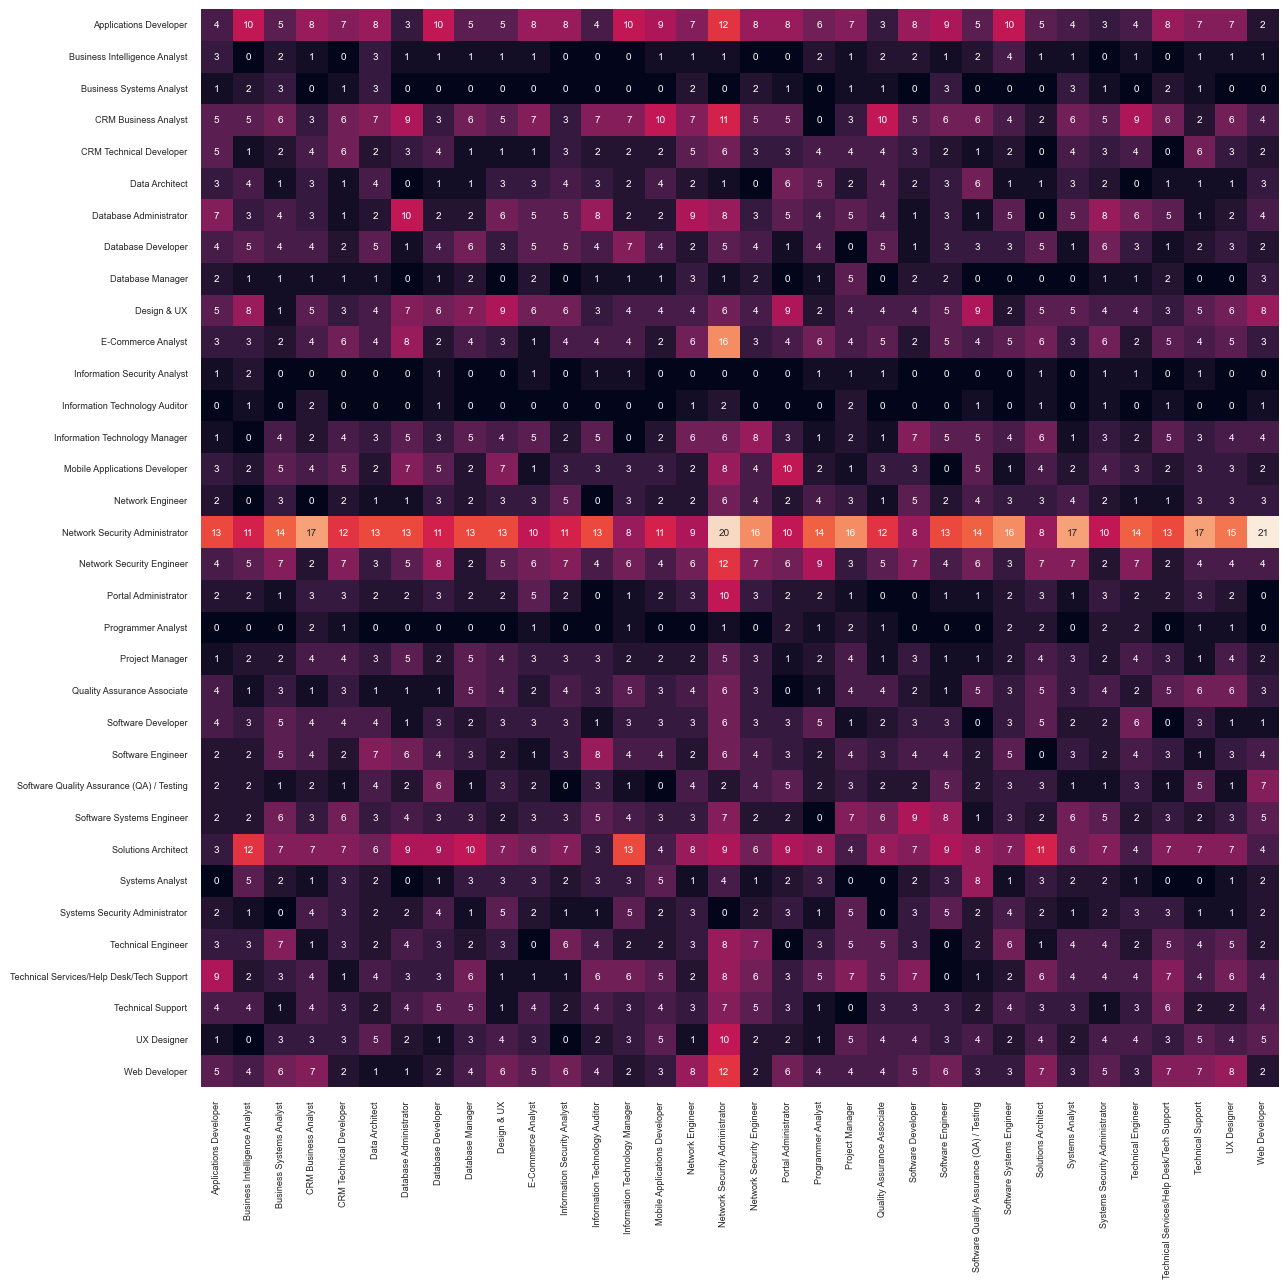

In [171]:
print_confusion_matrix(y_test4, y_pred4, clf_imp.classes_)

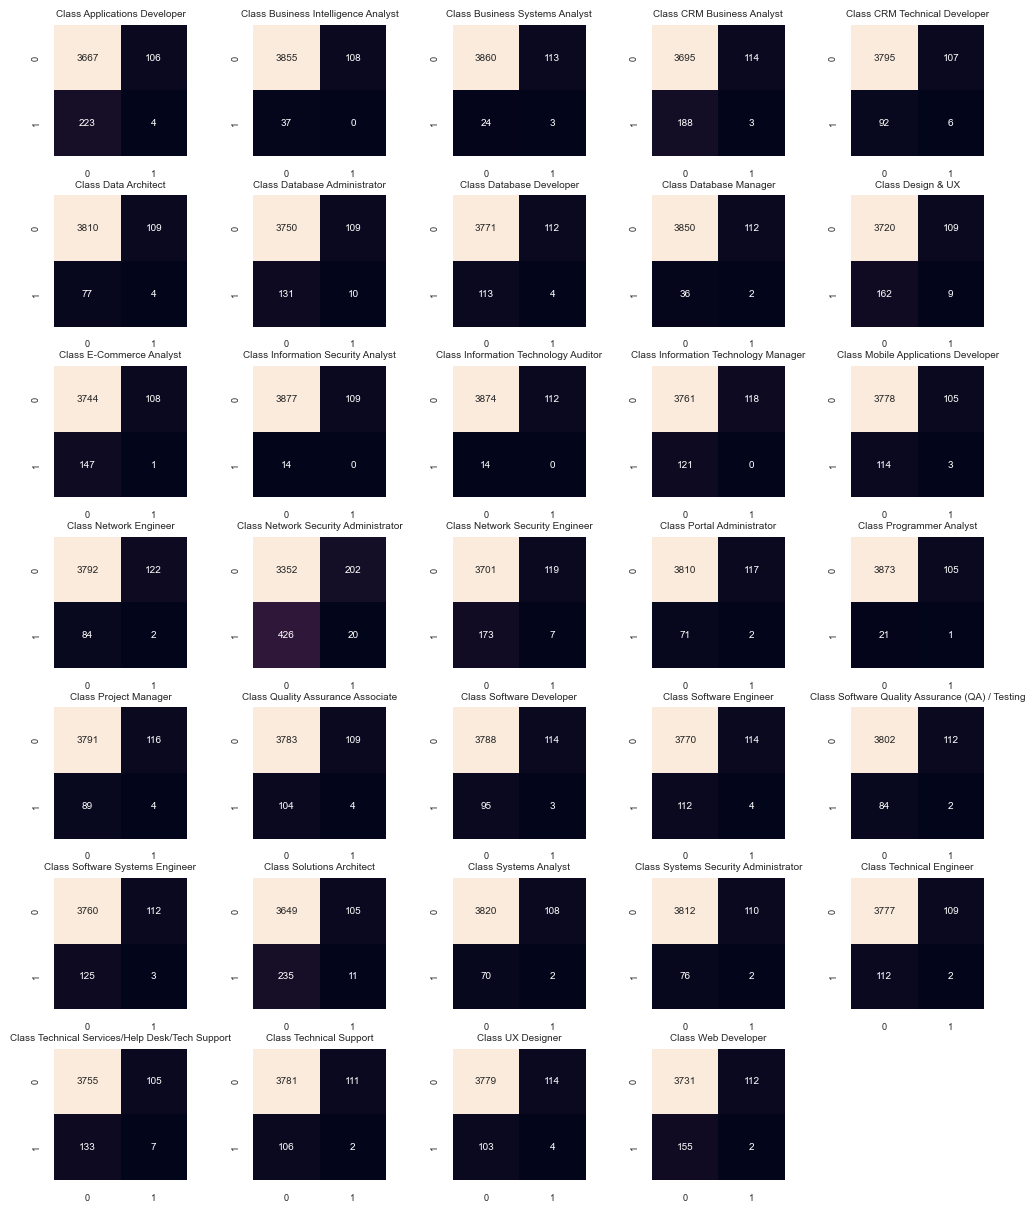

In [172]:
print_classwise_confusion_matrix(y_test4, y_pred4, clf_imp.classes_)

Looking at the classification report, some of the classes are not being predicted at all. This is because the model is not learning the features of the classes. This can be due to the imbalance in the data. We can try SMOTE to balance the data. We can also try binning the date.


In [175]:
#Using SMOTE to balance the data
smote = SMOTE(random_state=68)
X_smote, y_smote = smote.fit_resample(X_imp_ohe, labels)

In [177]:
#summarize class distribution
before = Counter(labels)
after = Counter(y_smote)
print(f"before: {before}")
print(f"after: {after}")

before: Counter({'Network Security Administrator': 1112, 'Network Security Engineer': 630, 'Network Engineer': 621, 'Project Manager': 602, 'Portal Administrator': 593, 'Database Administrator': 593, 'Information Technology Manager': 591, 'Software Engineer': 590, 'UX Designer': 589, 'Design & UX': 588, 'Software Developer': 587, 'CRM Business Analyst': 584, 'Business Systems Analyst': 582, 'Database Developer': 581, 'Solutions Architect': 578, 'Software Systems Engineer': 575, 'Software Quality Assurance (QA) / Testing': 571, 'Web Developer': 570, 'Database Manager': 570, 'CRM Technical Developer': 567, 'Quality Assurance Associate': 565, 'Technical Support': 565, 'Data Architect': 564, 'Systems Security Administrator': 562, 'Technical Services/Help Desk/Tech Support': 558, 'Information Technology Auditor': 558, 'Technical Engineer': 557, 'Applications Developer': 551, 'Systems Analyst': 550, 'E-Commerce Analyst': 546, 'Information Security Analyst': 543, 'Business Intelligence Analys

In [181]:
#now, train the classifier on oversampled data. We will use repeated stratified k-fold cross validation to evaluate the model
clf_smote = MLPClassifier(activation="relu", hidden_layer_sizes=(64, 32), learning_rate="constant", max_iter=1000, solver="adam")
crossval = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=68)

In [182]:
scores = cross_val_score(clf_smote, X_smote, y_smote, scoring='accuracy', cv=crossval, n_jobs=-1)

In [183]:
print(f"Cross Validation Scores: {scores}")

Cross Validation Scores: [0.10896588 0.10579212 0.10156043 0.11610685 0.10923036 0.11055276
 0.1034118  0.10499868 0.10238095 0.10555556 0.10658556 0.09706427
 0.10949484 0.09997355 0.11161069 0.10896588 0.09547739 0.09997355
 0.10740741 0.10608466 0.11108172 0.10843692 0.1034118  0.10023803
 0.10579212 0.11081724 0.11028828 0.09574187 0.0984127  0.09867725]


One more thing we can try is to bin the data. 


1. Analyst: 'Business Systems Analyst’, 'Business Intelligence Analyst’, 'Information Security Analyst’, 'Programmer Analyst’, 'Systems Analyst', 'CRM Business Analyst’, 'E-Commerce Analyst’
2. Designer: 'Design & UX', 'UX Designer’,
3. SWE: 'Software Developer', 'Software Engineer', Web Developer', 'Mobile Applications Developer', 'CRM Technical Developer', 'Database Developer’, 'Applications Developer', 'Network Security Engineer', 'Network Engineer’, 'Software Systems Engineer'
4. Managerial:  'Project Manager', 'Database Manager', 'Information Technology Manager', 
5. Support: 'Systems Security Administrator', 'Technical Support', 'Technical Services/Help Desk/Tech Support', 'Software Quality Assurance (QA) / Testing’, 'Quality Assurance Associate', 'Portal Administrator', 'Information Technology Auditor', 'Database Administrator', 'Technical Engineer', 'Network Security Administrator', 'Solutions Architect'

In [206]:
bins = {'Business Systems Analyst': 'Analyst', 'Business Intelligence Analyst': 'Analyst', 'Information Security Analyst': 'Analyst', 
        'Programmer Analyst': 'Analyst', 'Systems Analyst': 'Analyst', 'CRM Business Analyst': 'Analyst', 'E-Commerce Analyst': 'Analyst',
        'Design & UX': 'Designer', 'UX Designer': 'Designer',
        'Software Developer': 'SWE', 'Software Engineer': 'SWE', 'Web Developer': 'SWE', 'Mobile Applications Developer': 'SWE', 'CRM Technical Developer': 'SWE', 'Data Architect': 'SWE',
        'Database Developer': 'SWE', 'Applications Developer': 'SWE', 'Network Security Engineer': 'SWE', 'Network Engineer': 'SWE', 'Software Systems Engineer': 'SWE',
        'Project Manager': 'Managerial', 'Database Manager': 'Managerial', 'Information Technology Manager': 'Managerial', 
        'Systems Security Administrator': 'Support', 'Technical Support': 'Support', 'Technical Services/Help Desk/Tech Support': 'Support', 
        'Software Quality Assurance (QA) / Testing': 'Support', 'Quality Assurance Associate': 'Support', 'Portal Administrator': 'Support', 
        'Information Technology Auditor': 'Support', 'Database Administrator': 'Support', 'Technical Engineer': 'Support', 'Network Security Administrator': 'Support', 
        'Solutions Architect': 'Support',
}

In [209]:
df_imp["Suggested Job Role"] = df_imp["Suggested Job Role"].map(bins, na_action=None)

In [210]:
print(Counter(df_imp["Suggested Job Role"]))

Counter({'Support': 6812, 'SWE': 6374, 'Analyst': 3874, 'Managerial': 1763, 'Designer': 1177})


The data is not balanced even now but the imbalance is compartitively less pronounced.

In [213]:
labels_bin = df_imp["Suggested Job Role"]
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_imp_ohe, labels_bin, stratify=labels_bin, random_state=68, test_size=0.2)

In [214]:
#train the classifier on the new data
clf_bin = MLPClassifier(activation="relu", hidden_layer_sizes=(64, 32), learning_rate="constant", max_iter=1000, solver="adam")

In [215]:
clf_bin.fit(X_train5, y_train5)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [216]:
print("Training metrics after binning: ")
y_train_pred5 = clf_bin.predict(X_train5)
print_classification_report(y_train5, y_train_pred5, clf_bin.classes_)

Training metrics after binning: 
Mean Accuracy: 0.6244375
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.42      0.61      0.49      2135
    Designer       0.16      0.52      0.24       292
  Managerial       0.47      0.61      0.53      1086
         SWE       0.71      0.60      0.65      6045
     Support       0.78      0.66      0.71      6442

    accuracy                           0.62     16000
   macro avg       0.51      0.60      0.53     16000
weighted avg       0.67      0.62      0.64     16000


Accuracy for class 0 : 60.56206088992975 %
Accuracy for class 1 : 51.71232876712328 %
Accuracy for class 2 : 60.773480662983424 %
Accuracy for class 3 : 60.215053763440864 %
Accuracy for class 4 : 65.9267308289351 %


In [217]:
y_pred5 = clf_bin.predict(X_test5)
print("Testing metrics after binning: ")
print_classification_report(y_test5, y_pred5, clf_bin.classes_)

Testing metrics after binning: 
Mean Accuracy: 0.29325
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.11      0.16      0.13       545
    Designer       0.03      0.06      0.04        97
  Managerial       0.06      0.08      0.07       268
         SWE       0.41      0.34      0.37      1543
     Support       0.40      0.35      0.37      1547

    accuracy                           0.29      4000
   macro avg       0.20      0.20      0.20      4000
weighted avg       0.33      0.29      0.31      4000


Accuracy for class 0 : 15.963302752293579 %
Accuracy for class 1 : 6.185567010309279 %
Accuracy for class 2 : 7.835820895522389 %
Accuracy for class 3 : 33.63577446532729 %
Accuracy for class 4 : 34.906270200387844 %


Confusion Matrix:


<Figure size 1400x1400 with 0 Axes>

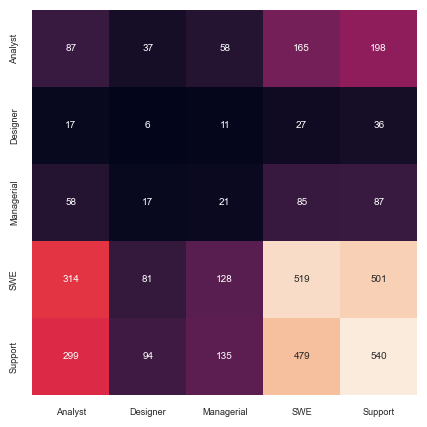

In [228]:
print_confusion_matrix(y_test5, y_pred5, clf_bin.classes_, True)

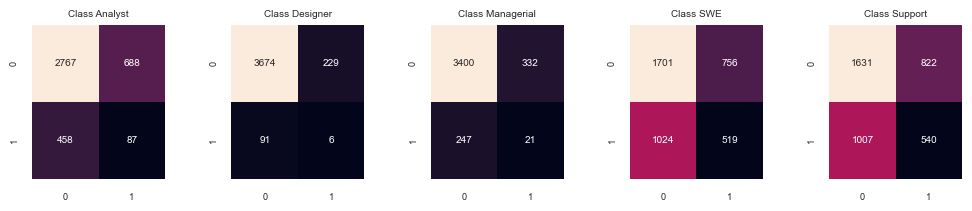

In [241]:
print_classwise_confusion_matrix(y_test5, y_pred5, clf_bin.classes_, True)

This has improved the accuracy of the model to 29.35%. The accuracy of the model is still very low. The class SWE and Support show the worst performance even though they have the highest number of samples. This is because the model is not learning the features of the classes. SMOTE will not help here since the issue is with the classes that have high number of samples. SMOTE can although help improve true positives in Managerial, Designer and Analyst classes.

We can try to remove all the categorical features and use only the numerical features to further reduce dimensionality of the data and see if the model performs better.

In [242]:
print(df_imp.dtypes)


Acedamic percentage in Operating Systems     int64
percentage in Algorithms                     int64
Percentage in Programming Concepts           int64
Percentage in Software Engineering           int64
Percentage in Computer Networks              int64
Percentage in Electronics Subjects           int64
Percentage in Computer Architecture          int64
Percentage in Mathematics                    int64
Percentage in Communication skills           int64
Hours working per day                        int64
Logical quotient rating                      int64
hackathons                                   int64
coding skills rating                         int64
public speaking points                       int64
can work long time before system?           object
self-learning capability?                   object
Extra-courses did                           object
certifications                              object
reading and writing skills                  object
memory capability score        

In [248]:
categorical_features = ['can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'reading and writing skills', 
                        'memory capability score', 'Interested subjects', 'Job/Higher Studies?', 'interested career area ', 'Type of company want to settle in?',
                        'Salary Range Expected', 'Management or Technical', 'Salary/work']
df_num = df_imp.drop(categorical_features, axis=1)

In [249]:
print(df_num.dtypes)

Acedamic percentage in Operating Systems     int64
percentage in Algorithms                     int64
Percentage in Programming Concepts           int64
Percentage in Software Engineering           int64
Percentage in Computer Networks              int64
Percentage in Electronics Subjects           int64
Percentage in Computer Architecture          int64
Percentage in Mathematics                    int64
Percentage in Communication skills           int64
Hours working per day                        int64
Logical quotient rating                      int64
hackathons                                   int64
coding skills rating                         int64
public speaking points                       int64
Suggested Job Role                          object
dtype: object


In [272]:
X_num = df_num[df_num.columns[:-1]]
X_num = scaler.fit_transform(X_num)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_num, labels_bin, stratify=labels_bin, random_state=68, test_size=0.2)


In [271]:
clf_bin_num = MLPClassifier(activation="relu", hidden_layer_sizes=(64, 32), learning_rate="constant", max_iter=1000, solver="adam")

In [261]:
clf_bin_num.fit(X_train6, y_train6)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [262]:
print("Training metrics after binning and removing categorical data: ")
y_train_pred6 = clf_bin_num.predict(X_train6)
print_classification_report(y_train6, y_train_pred6, clf_bin_num.classes_)

Training metrics after binning and removing categorical data: 
Mean Accuracy: 0.478875
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.31      0.45      0.37      2094
    Designer       0.06      0.43      0.10       128
  Managerial       0.06      0.35      0.10       239
         SWE       0.62      0.49      0.55      6455
     Support       0.63      0.48      0.55      7084

    accuracy                           0.48     16000
   macro avg       0.33      0.44      0.33     16000
weighted avg       0.57      0.48      0.51     16000


Accuracy for class 0 : 45.4632282712512 %
Accuracy for class 1 : 42.96875 %
Accuracy for class 2 : 35.146443514644346 %
Accuracy for class 3 : 48.7993803253292 %
Accuracy for class 4 : 48.29192546583851 %


In [263]:
y_pred6 = clf_bin_num.predict(X_test6)
print("Testing metrics after binning and removing categorical data: ")
print_classification_report(y_test6, y_pred6, clf_bin_num.classes_)

Testing metrics after binning and removing categorical data: 
Mean Accuracy: 0.30325
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.12      0.18      0.15       520
    Designer       0.00      0.00      0.00        34
  Managerial       0.01      0.06      0.02        64
         SWE       0.39      0.31      0.35      1588
     Support       0.45      0.35      0.39      1794

    accuracy                           0.30      4000
   macro avg       0.20      0.18      0.18      4000
weighted avg       0.37      0.30      0.33      4000


Accuracy for class 0 : 18.076923076923077 %
Accuracy for class 1 : 0.0 %
Accuracy for class 2 : 6.25 %
Accuracy for class 3 : 31.234256926952142 %
Accuracy for class 4 : 34.50390189520624 %


Confusion Matrix:


<Figure size 1400x1400 with 0 Axes>

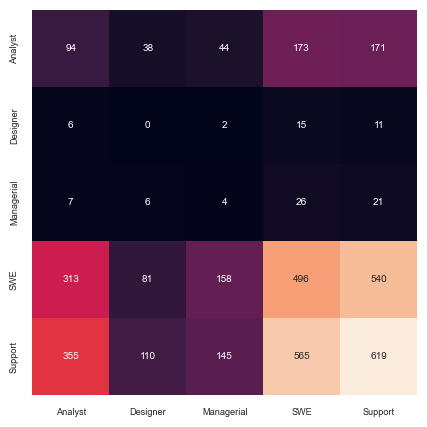

In [264]:
print_confusion_matrix(y_test6, y_pred6, clf_bin_num.classes_, True)

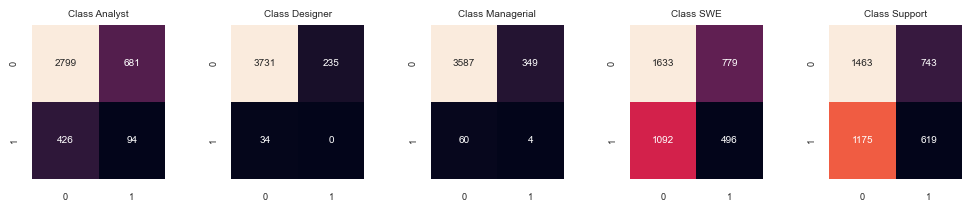

In [265]:
print_classwise_confusion_matrix(y_test6, y_pred6, clf_bin_num.classes_, True)

We saw a slight improvement in accuracy; from 29% to 30%. The model is clearly overfitting on the major class. We can try SMOTE here as our one final strategy :')

In [281]:
#use smote to augment the minor classes and equalise the samples
X_bin_num_smote, y_bin_num_smote = smote.fit_resample(X_num, labels_bin)

In [282]:
before = Counter(labels_bin)
print(f"before SMOTE on binned labels: ", before)
after = Counter(y_bin_num_smote)
print(f"after SMOTE on binned labels: ", after)

before SMOTE on binned labels:  Counter({'Support': 6812, 'SWE': 6374, 'Analyst': 3874, 'Managerial': 1763, 'Designer': 1177})
after SMOTE on binned labels:  Counter({'SWE': 6812, 'Support': 6812, 'Analyst': 6812, 'Designer': 6812, 'Managerial': 6812})


In [287]:
clf_bin_num_smote = MLPClassifier(activation="relu", hidden_layer_sizes=(64, 32), learning_rate="constant", max_iter=1000, solver="adam")

In [288]:
clf_bin_num_smote.fit(X_bin_num_smote, y_bin_num_smote)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [289]:
print("Training metrics after binning, removing categorical data and smote: ")
y_train_pred7 = clf_bin_num_smote.predict(X_train6)
print_classification_report(y_train6, y_train_pred7, clf_bin_num_smote.classes_)

Training metrics after binning, removing categorical data and smote: 
Mean Accuracy: 0.3120625
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.28      0.27      0.27      3290
    Designer       0.79      0.33      0.47      2229
  Managerial       0.62      0.22      0.33      3960
         SWE       0.17      0.39      0.23      2176
     Support       0.30      0.38      0.34      4345

    accuracy                           0.31     16000
   macro avg       0.43      0.32      0.33     16000
weighted avg       0.43      0.31      0.33     16000


Accuracy for class 0 : 26.50455927051672 %
Accuracy for class 1 : 33.37819650067295 %
Accuracy for class 2 : 22.070707070707073 %
Accuracy for class 3 : 38.83272058823529 %
Accuracy for class 4 : 38.15880322209436 %


In [290]:
y_pred7 = clf_bin_num_smote.predict(X_test6)
print("Testing metrics after binning and removing categorical data: ")
print_classification_report(y_test6, y_pred7, clf_bin_num_smote.classes_)

Testing metrics after binning and removing categorical data: 
Mean Accuracy: 0.31125
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.31      0.27      0.29       896
    Designer       0.76      0.34      0.47       533
  Managerial       0.62      0.22      0.33       990
         SWE       0.15      0.37      0.22       526
     Support       0.30      0.39      0.34      1055

    accuracy                           0.31      4000
   macro avg       0.43      0.32      0.33      4000
weighted avg       0.42      0.31      0.33      4000


Accuracy for class 0 : 26.89732142857143 %
Accuracy for class 1 : 33.58348968105066 %
Accuracy for class 2 : 22.12121212121212 %
Accuracy for class 3 : 37.26235741444867 %
Accuracy for class 4 : 38.862559241706165 %


Confusion Matrix:


<Figure size 1400x1400 with 0 Axes>

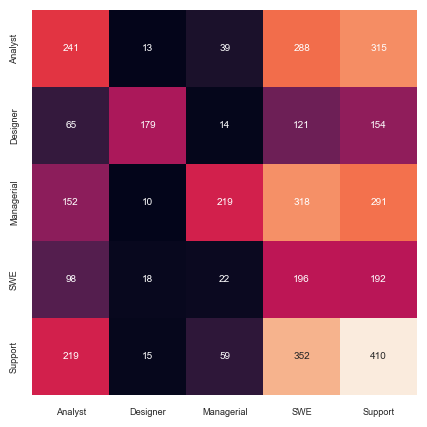

In [291]:
print_confusion_matrix(y_test6, y_pred7, clf_bin_num_smote.classes_, True)

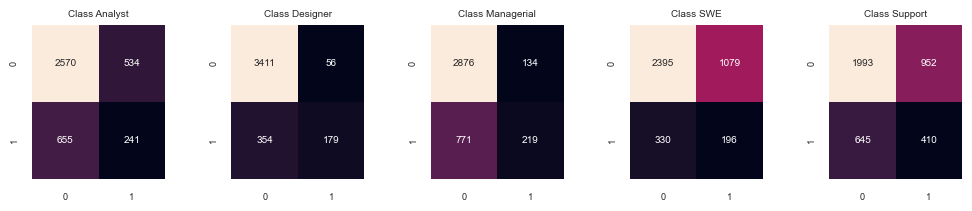

In [292]:
print_classwise_confusion_matrix(y_test6, y_pred7, clf_bin_num_smote.classes_, True)

Using smote we get a test accuracy of 31.1%. This is a slight improvement over the previous model. We can see that the number of correctly identified samples has also increased.

In [293]:
clf_smote_bin = MLPClassifier(activation="relu", hidden_layer_sizes=(64, 32), learning_rate="constant", max_iter=1000, solver="adam")
crossval_bin = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=68)

In [294]:
scores_bin = cross_val_score(clf_smote_bin, X_bin_num_smote, y_bin_num_smote, scoring='accuracy', cv=crossval_bin, n_jobs=-1)

In [297]:
print(f"Cross validation scores after SMOTE, binning of labels and removing categorical data: {scores_bin}")

Cross validation scores after SMOTE, binning of labels and removing categorical data: [0.41250734 0.41001174 0.42131533 0.39136817 0.41705813 0.42131533
 0.40883735 0.41970053 0.41426894 0.42146213 0.41103934 0.40942454
 0.40458015 0.41559014 0.40692895]


**MLP is not a good model to handle class imbalance. The accuracy peaks at around 31%. Maybe using models like XGBoost will give better results and not overfit on the major class.**

### Integration with assignment 1

To make the dataset relevant to IIIT Delhi, we can change the name of the columns to actual subjects taught at IIIT Delhi (which I considered in Assignment 1). 

- Algorithms - Data Structures and Algorithms
- Programming Concepts - Advanced Programming
- Software Engineering - Software Development using Open Source
- Electronics Subjects - Hardware and Electronics (can leave it as is because it does not refer to one particular subject)
- Computer Architecture - Computer Organization (which is a core course at IIIT Delhi)
- Mathematics - Pure Mathematics (can leave it as is because it does not refer to one particular subject)
- Communication skills - Technical Communication (which is a core course at IIIT Delhi)

In [313]:
df_iiitd = df_num.rename(columns = {'percentage in Algorithms': 'percentage in data structures and algorithms', 'Percentage in Programming Concepts': 'precentage in advanced programming', 
'Percentage in Software Engineering': 'percentage in SDOS', 'Percentage in Electronics Subjects': 'percentage in hardware and electronics', 'Percentage in Computer Architecture': 'percentage in computer organisation',
'Percentage in Mathematics': 'percentage in pure mathematics', 'Percentage in Communication skills': 'percentage in technical communication'}, inplace=False)

In [314]:
df_iiitd.head()

,Acedamic percentage in Operating Systems,percentage in data structures and algorithms,precentage in advanced programming,percentage in SDOS,Percentage in Computer Networks,percentage in hardware and electronics,percentage in computer organisation,percentage in pure mathematics,percentage in technical communication,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,SWE
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,Support
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,Support
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,Support
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,Analyst


In [315]:
#follow the same procedure as before: SMOTE, standardisation, train-test split and model training

X_iiitd = df_iiitd[df_iiitd.columns[:-1]]
X_iiitd = scaler.fit_transform(X_iiitd)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_iiitd, labels_bin, stratify=labels_bin, random_state=68, test_size=0.2)

In [316]:
#use smote to augment the minor classes and equalise the samples
X_iiitd_smote, y_iiitd_smote = smote.fit_resample(X_iiitd, labels_bin)
print(Counter(y_iiitd_smote))

Counter({'SWE': 6812, 'Support': 6812, 'Analyst': 6812, 'Designer': 6812, 'Managerial': 6812})


In [317]:
clf_iiitd_smote = MLPClassifier(activation="relu", hidden_layer_sizes=(64, 32), learning_rate="constant", max_iter=1000, solver="adam")

In [318]:
clf_iiitd_smote.fit(X_iiitd_smote, y_iiitd_smote)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [319]:
print("Training metrics for data connected to A1: ")
y_train_pred8 = clf_iiitd_smote.predict(X_train7)
print_classification_report(y_train7, y_train_pred8, clf_iiitd_smote.classes_)

Training metrics for data connected to A1: 
Mean Accuracy: 0.308125
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.45      0.27      0.34      5270
    Designer       0.82      0.31      0.44      2512
  Managerial       0.58      0.25      0.35      3303
         SWE       0.14      0.39      0.21      1858
     Support       0.22      0.40      0.29      3057

    accuracy                           0.31     16000
   macro avg       0.44      0.32      0.32     16000
weighted avg       0.46      0.31      0.33     16000


Accuracy for class 0 : 26.62239089184061 %
Accuracy for class 1 : 30.573248407643312 %
Accuracy for class 2 : 24.6745382985165 %
Accuracy for class 3 : 39.07427341227126 %
Accuracy for class 4 : 39.842983316977424 %


In [320]:
print("Testing metrics for data connected to A1: ")
y_pred8 = clf_iiitd_smote.predict(X_test7)
print_classification_report(y_test7, y_pred8, clf_iiitd_smote.classes_)

Testing metrics for data connected to A1: 
Mean Accuracy: 0.297
Classification Report: 
              precision    recall  f1-score   support

     Analyst       0.45      0.26      0.33      1329
    Designer       0.81      0.31      0.45       618
  Managerial       0.54      0.23      0.32       847
         SWE       0.14      0.39      0.21       462
     Support       0.20      0.37      0.26       744

    accuracy                           0.30      4000
   macro avg       0.43      0.31      0.31      4000
weighted avg       0.44      0.30      0.32      4000


Accuracy for class 0 : 26.109857035364936 %
Accuracy for class 1 : 30.906148867313917 %
Accuracy for class 2 : 22.55017709563164 %
Accuracy for class 3 : 39.39393939393939 %
Accuracy for class 4 : 37.23118279569893 %


Confusion Matrix:


<Figure size 1400x1400 with 0 Axes>

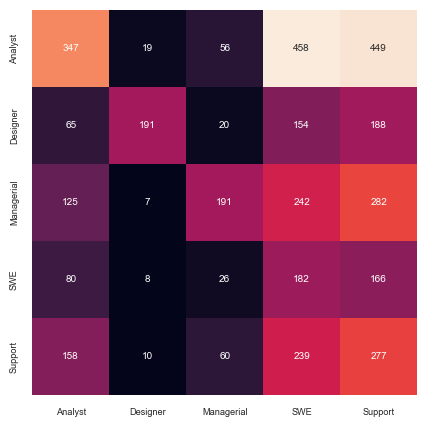

In [321]:
print_confusion_matrix(y_test7, y_pred8, clf_iiitd_smote.classes_, True)

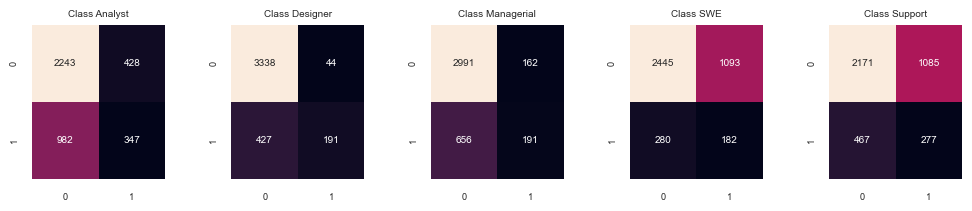

In [322]:
print_classwise_confusion_matrix(y_test7, y_pred8, clf_iiitd_smote.classes_, True)